In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

In [2]:
df_1 = pd.read_csv("SpotifyFeatures.csv")
df_1.shape

(232725, 18)

In [3]:
colnames = df_1.columns
colnames

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [4]:
df_1.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816


In [5]:
df_1 = df_1.drop_duplicates()

In [6]:
df_1 = df_1.drop(columns=["track_id"], axis=1)
df_1.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
df_1.key.value_counts()

C     27583
G     26390
D     24077
C#    23201
A     22671
F     20279
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: key, dtype: int64

In [8]:
df_1.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [9]:
df_1.artist_name.nunique(), df_1.track_name.nunique()

(14564, 148615)

In [10]:
# len(df_1.genre == '''Children’s Music''')
len(df_1[df_1.genre=='''Children’s Music'''])

9353

In [11]:
categorical_features = df_1.describe(include=["object",'category']).columns
numerical_features = df_1.describe(include=["int64","float64"]).columns
categorical_features, numerical_features

(Index(['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature'], dtype='object'),
 Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
        'valence'],
       dtype='object'))

In [12]:
def plot_cat(categorical_features, it):
    for idx, column in enumerate(categorical_features):
        if column == 'artist_name' or column == 'track_name':
            continue
        plt.figure(figsize=(15, 5))
        unique = df_1[column].value_counts(ascending=True);

        #plt.subplot(1, len(categorical_features), idx+1)
        plt.title("Count of "+ column)
        sns.countplot(data=df_1, x=column,palette = "dark")
        #plt.bar(unique.index, unique.values);
        plt.xticks(rotation = 90, size = 15)

        plt.xlabel(column, fontsize=12)
        plt.ylabel("Number of "+ column, fontsize=12)
        filename = "Count of "+column+" "+str(it)+".png"
        plt.savefig(filename, bbox_inches="tight")

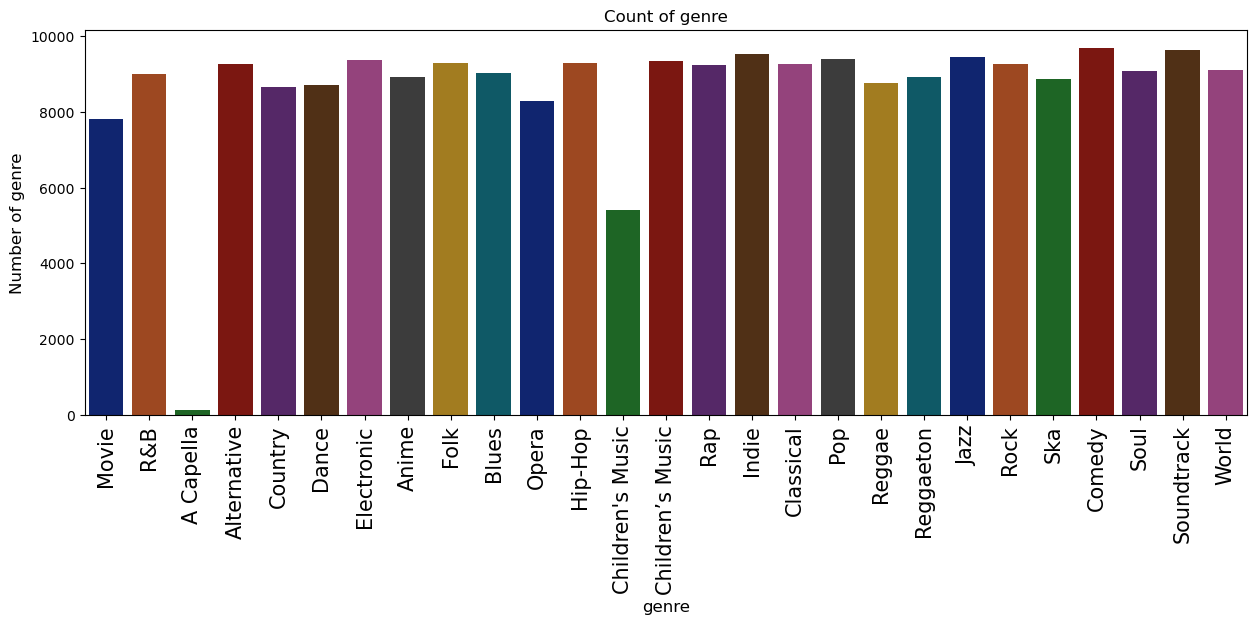

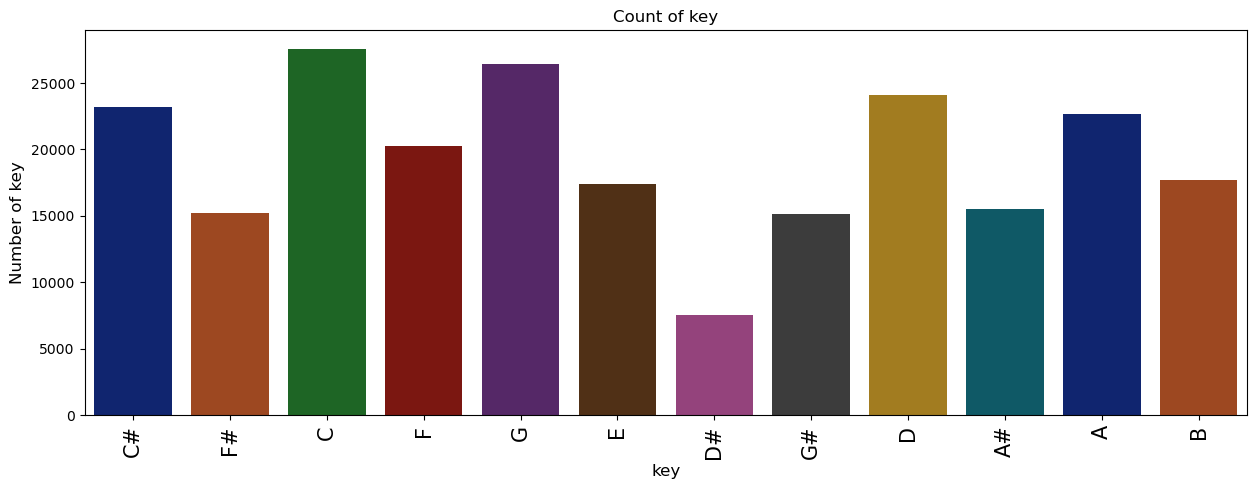

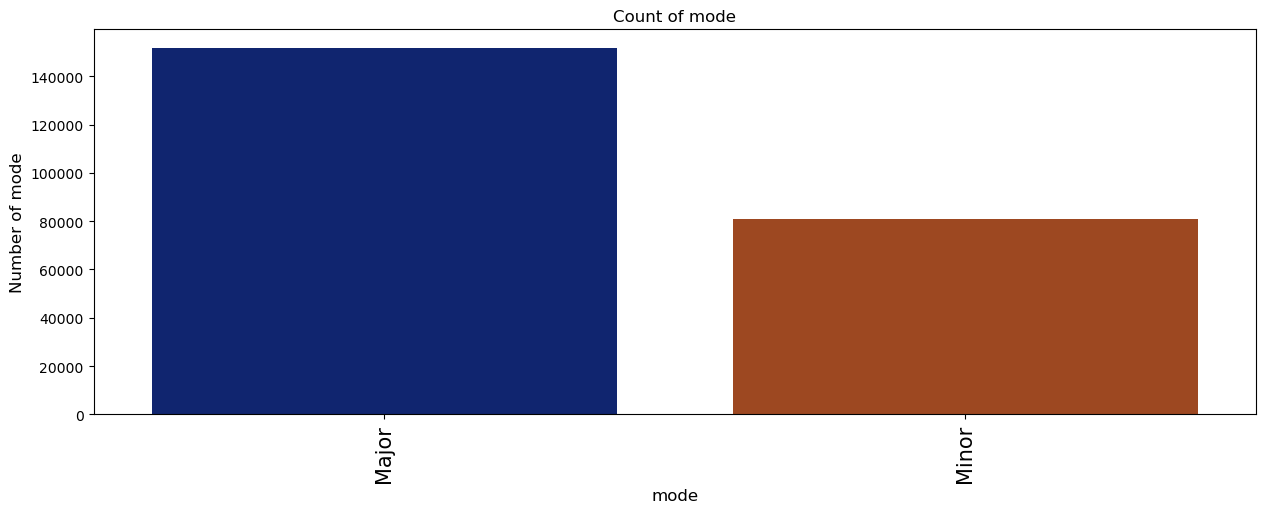

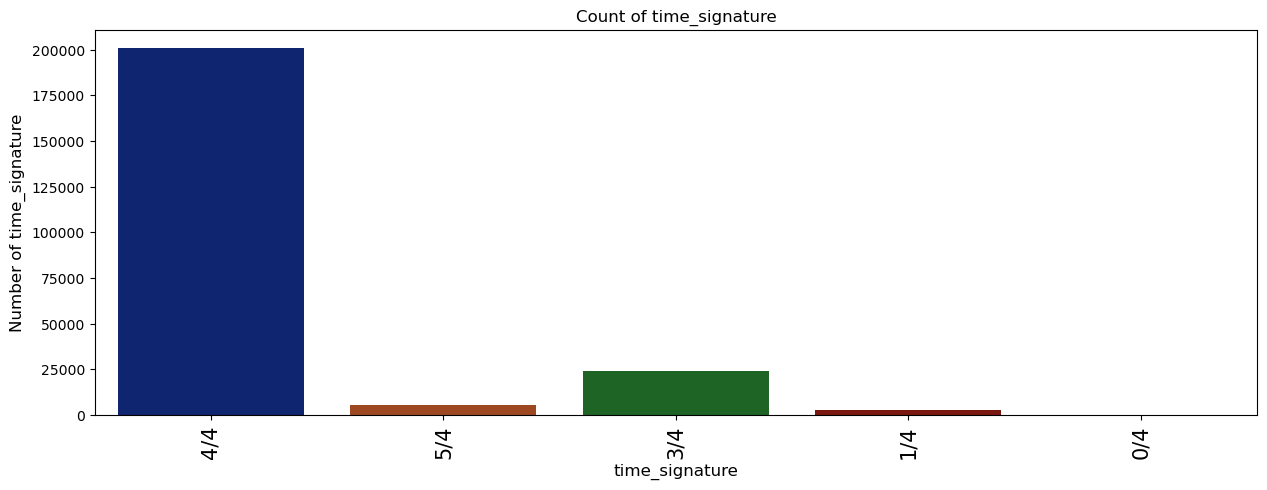

In [13]:
plot_cat(categorical_features, 1)

We can remove a few genres and time signatures from the dataset since these have very low count of elements. This can reduce the size of dummy variables to be created and hence simplify the problem to a great extent. The size of dataset will still be more than 1,00,000.

In [14]:
df = df_1

In [15]:
df.time_signature.unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [16]:
df.drop(df[df['genre'] == 'A Capella'].index, inplace = True)
df.drop(df[df['genre'] == '''Children's Music'''].index, inplace = True)
df.drop(df[df['genre'] == 'Opera'].index, inplace = True)
df.drop(df[df['genre'] == 'Movie'].index, inplace = True)
df.drop(df[df['genre'] == 'Comedy'].index, inplace = True)
df.drop(df[df['genre'] == 'Classical'].index, inplace = True)
df.drop(df[df['genre'] == 'Soundtrack'].index, inplace = True)
df.drop(df[df['time_signature'] == '5/4'].index, inplace = True)
df.drop(df[df['time_signature'] == '5/4'].index, inplace = True)
df.drop(df[df['time_signature'] == '1/4'].index, inplace = True)
df.drop(df[df['time_signature'] == '0/4'].index, inplace = True)
df.drop(df[df['time_signature'] == '3/4'].index, inplace = True)
df.shape

(168441, 17)

In [17]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,61,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680
139,R&B,Olivia O'Brien,Love Myself,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
140,R&B,ELHAE,Needs,61,0.6610,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250


This shows that the size of dataset is still greater than 1,00,000.

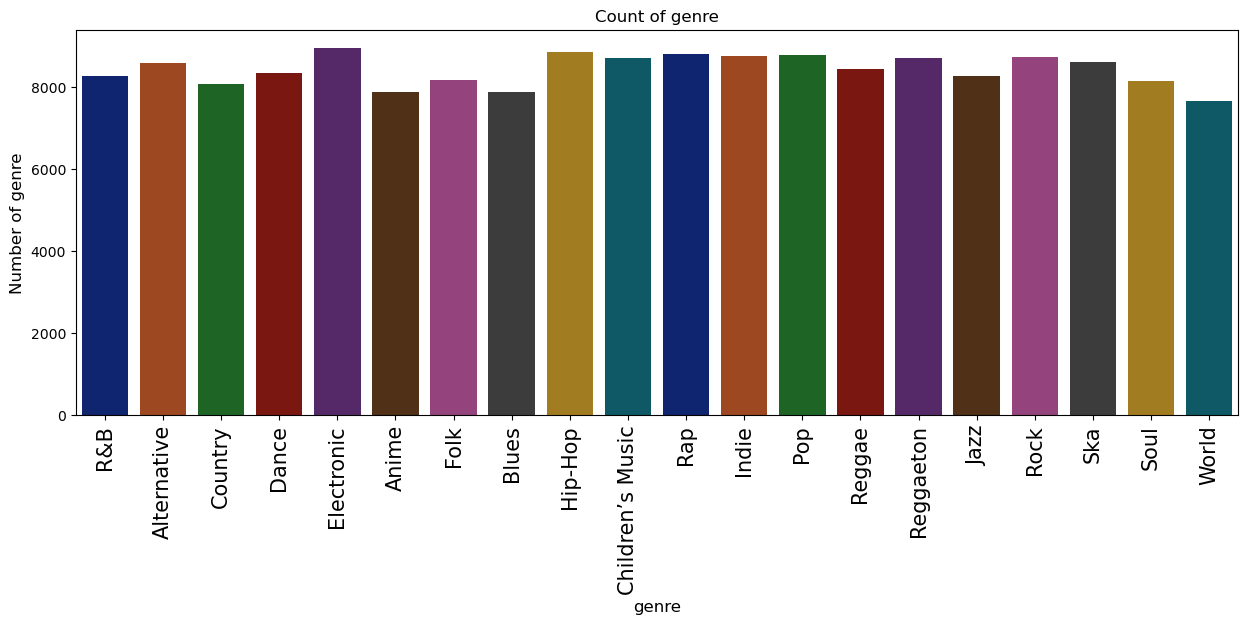

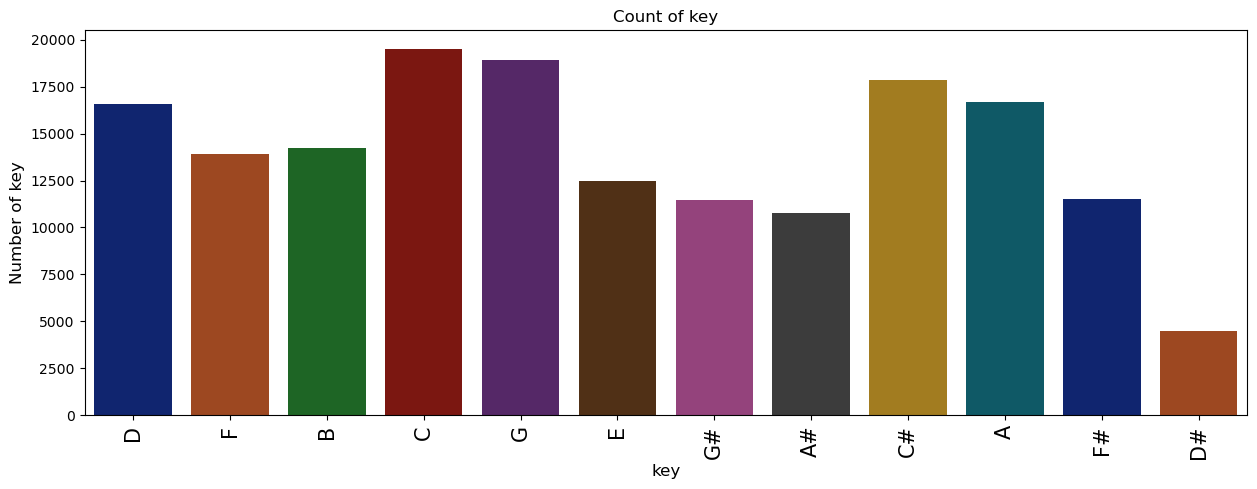

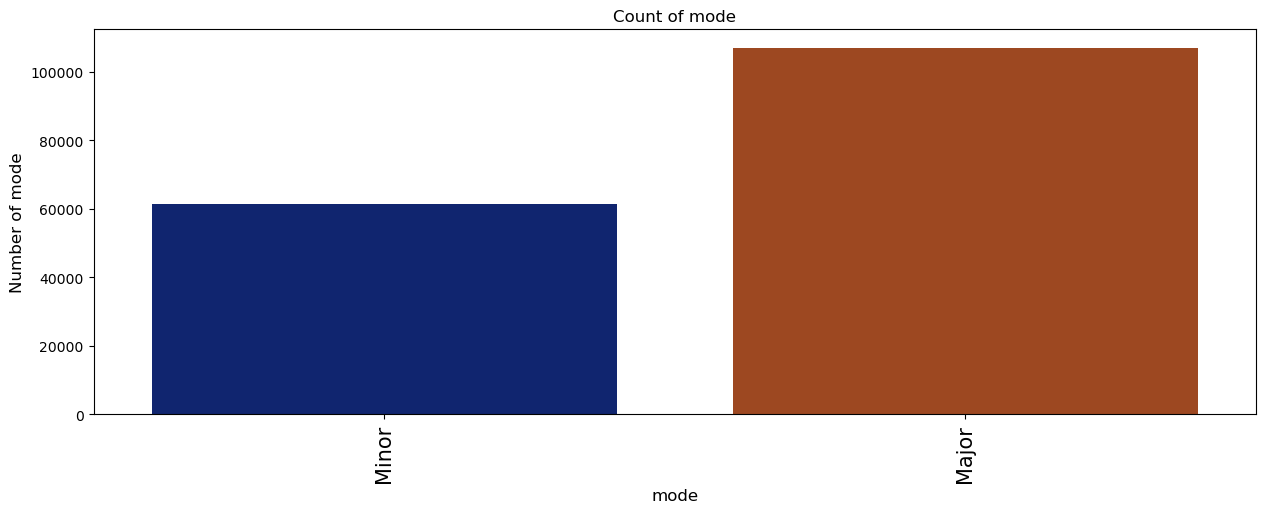

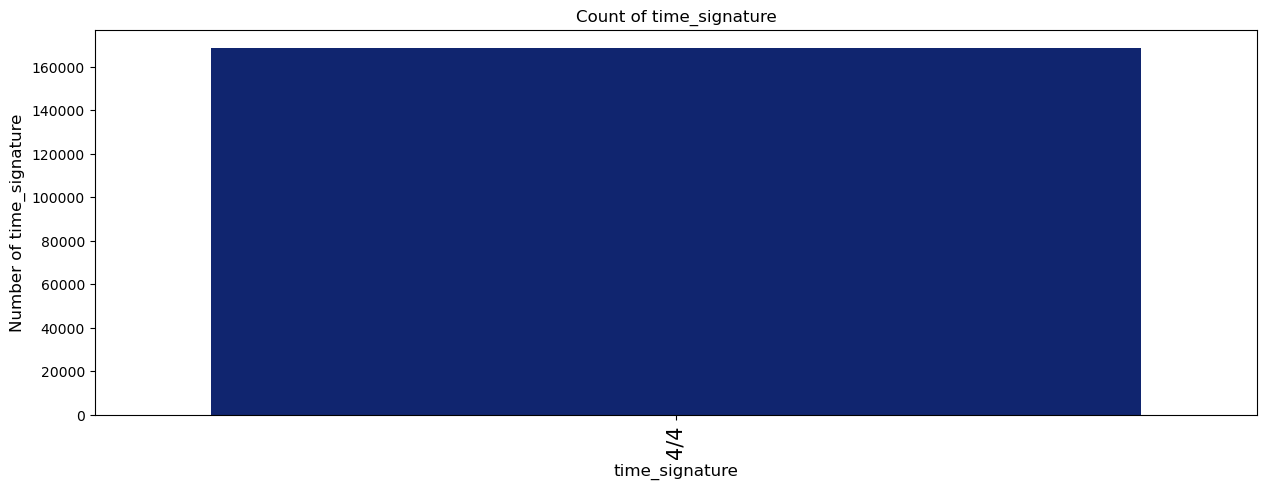

In [18]:
categorical_features_2 = df.describe(include=["object",'category']).columns
plot_cat(categorical_features_2, 2)

In [19]:
df.shape

(168441, 17)

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168441 entries, 135 to 232724
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             168441 non-null  object 
 1   artist_name       168441 non-null  object 
 2   track_name        168441 non-null  object 
 3   popularity        168441 non-null  int64  
 4   acousticness      168441 non-null  float64
 5   danceability      168441 non-null  float64
 6   duration_ms       168441 non-null  int64  
 7   energy            168441 non-null  float64
 8   instrumentalness  168441 non-null  float64
 9   key               168441 non-null  object 
 10  liveness          168441 non-null  float64
 11  loudness          168441 non-null  float64
 12  mode              168441 non-null  object 
 13  speechiness       168441 non-null  float64
 14  tempo             168441 non-null  float64
 15  time_signature    168441 non-null  object 
 16  valence           

In [21]:
df.to_csv("EDA_done.csv")

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [23]:
df_2 = pd.read_csv("EDA_done.csv")

In [24]:
# Handle NaN values in the 'genre' and 'mode' columns
df_2['genre'] = df_2['genre'].fillna('')
df_2['mode'] = df_2['mode'].fillna('')


In [25]:
# Combine genre, mode, and popularity into a single text column for vectorization
df_2['text'] = df_2['genre'] + ' ' + df_2['mode'] + ' ' + df_2['popularity'].astype(str)


In [26]:
# Drop rows with NaN values in the 'text' column
df_2= df_2.dropna(subset=['text'])

In [27]:

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_2['text'])


In [28]:
# Initialize Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='cosine')
nn_model.fit(X)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=1)

In [29]:
# User input for genre, mode, and popularity
selected_genre = input('Select Genre: ')
selected_mode = input('Select Mode (major/minor): ')
popularity = int(input('Enter Popularity (0-100): '))

Select Genre: Jazz
Select Mode (major/minor): major
Enter Popularity (0-100): 76


In [30]:
# Predict artist and track based on user input
genre_query = selected_genre + ' '
mode_query = selected_mode + ' '
popularity_query = str(popularity)
query = genre_query + mode_query + popularity_query
query_vector = vectorizer.transform([query])
_, index = nn_model.kneighbors(query_vector, n_neighbors=1)
predicted_artist = df_1.loc[index[0][0], 'artist_name']
predicted_track = df_1.loc[index[0][0], 'track_name']

print(f'Predicted artist and track for "{selected_genre}" genre, "{selected_mode}" mode, and popularity {popularity}:')
print(f'Track Name: {predicted_track}')
print(f'Artist: {predicted_artist}')

Predicted artist and track for "Jazz" genre, "major" mode, and popularity 76:
Track Name: Babies (feat. Alessia Cara)
Artist: KYLE
